### <font color="#00bfff">⑤Sex(性別)データを分割して、分析</font>

In [1]:
"""ライブラリのインポート
"""
import numpy as np
import pandas as pd

In [2]:
"""データの読み込み
"""
data=pd.read_csv('train.csv')

#### <font color="#FFD700">各カラムの意味</font>

| <font color="8EF1FF"> カラム名 </font>  | <font color="8EF1FF"> 意味  </font> |
|:-----------|:------------|
| PassengerId  | 乗客のID |
| Survived   | 生存フラグ（0=死亡、1=生存） |
| Pclass   | チケットクラス |
| Name   | 乗客の名前 |
| Sex   | 性別（male=男性、female＝女性） |
| SibSp     | 兄弟/配偶者の数 |
| parch    | 親/子供の数 |
| ticket    | チケット番号 |
| fare    | 料金 |
| cabin     | 客室番号 |
| Embarked     | 出港地（タイタニックへ乗った港） |


<span style="font-size: 15px; color: #8EF1FF;">pclass=チケットクラス</span><br>
<span style="font-size: 12px;">
1 = 上層クラス（お金持ち）<br>
2 = 中級クラス（一般階級）<br>
3 = 下層クラス（労働階級）</span>


<span style="font-size: 15px; color: #8EF1FF;">Embarked = 出港地（タイタニックへ乗った港）</span><br>
<span style="font-size: 12px;">
C = Cherbourg（フランス）<br>
Q = Queenstown（アイルランド）<br>
S = Southampton（イングランド）</span>


### ●基本統計量

In [3]:
"""dataの基本統計量
"""
data.describe()

#Age(年齢)・Cabin(客室番号)・Embarked(出港地)に欠損値あり
#外れ値なし

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### ●Sex(性別)のダミー変数化
<p style="text-indent:2em">male=0　female=1　に置換</p>

In [4]:
"""ダミー変数化
"""
data["Sex"][data["Sex"]=='male']=0
data["Sex"][data["Sex"]=='female']=1

c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### ●Age(年齢)の欠損値の補完

In [5]:
"""欠損値を平均値で補完
"""
data["Age"][data["Age"].isnull()]=data["Age"].mean()

#今回は平均値で埋めるが、実務ではニューラルネットを使い予測値で埋めることが一般的

c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### ●性別ごとにデータを分割

In [6]:
"""男女でデータを分割
"""
data_f=data[data["Sex"]==1]
data_m=data[data["Sex"]==0]

### ●データの分割

<p style="text-indent:1em">male(男)</p>

In [7]:
#説明変数(Pclass,Sex,Age,SibSp,Parch,Fare)
X_m=data_m.iloc[0:,[2,5,6,7,9]]
#目的変数(Survived)
y_m=data_m.iloc[0:,[1]]

"""訓練データとテストデータに分割(7:3)
"""
from sklearn.model_selection import train_test_split
X_train_m,X_test_m,y_train_m,y_test_m=train_test_split(X_m,y_m,test_size=0.3,random_state=1234)

<p style="text-indent:1em">female(女)</p>

In [8]:
#説明変数(Pclass,Sex,Age,SibSp,Parch,Fare)
X_f=data_f.iloc[0:,[2,5,6,7,9]]
#目的変数(Survived)
y_f=data_f.iloc[0:,[1]]

"""訓練データとテストデータに分割(7:3)
"""
from sklearn.model_selection import train_test_split
X_train_f,X_test_f,y_train_f,y_test_f=train_test_split(X_f,y_f,test_size=0.3,random_state=1234)

### <font color="#da70d6">male(男)の分析</font>

### ●グリッドサーチ

<font color="#FFB6C1">①最適な学習率の算出</font><br>
<p style="text-indent:1em">(0.005),(0.006),(0.007),(0.008),(0.009),(0.01)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">0.008</p>

<font color="#FFB6C1">②最適な学習回数の算出</font><br>
<p　style="text-indent:1em">学習率を0.008に固定</p>
<p style="text-indent:1em">(100),(200),(300),(400),(500)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">200</p>

<font color="#FFB6C1">③最適な中間層数の算出</font><br>
<p　style="text-indent:1em">学習率を0.008、学習回数を200に固定</p>
<p style="text-indent:1em">(64),(64,64),(64,64,64),(64,64,64,64),(64,64,64,64,64)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(64,64,64,64,64)→4個</p>

<font color="#FFB6C1">④単調増加</font><br>
<p　style="text-indent:1em">学習率を0.008、学習回数を200に固定、中間層数は4個</p>
<p style="text-indent:1em">(32,64,128,256),(64,128,256,512)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(64,128,256,512)</p>

<font color="#FFB6C1">⑤単調減少</font><br>
<p　style="text-indent:1em">学習率を0.008、学習回数を200に固定、中間層数は4個</p>
<p style="text-indent:1em">(64,128,256,512),(512,256,128,64),(256,128,64,32)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(64, 128, 256, 512)</p>

<font color="#FFB6C1">⑥単調</font><br>
<p　style="text-indent:1em">学習率を0.008、学習回数を200に固定、中間層数は4個</p>
<p style="text-indent:1em">(64,128,256,512),(32,32,32,32),(64,64,64,64),(128,128,128,128),(256,256,256,256),(512,512,512,512)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(64,128,256,512)</p>


<font color="#FFB6C1">⑦山なり</font><br>
<p　style="text-indent:1em">学習率を0.008、学習回数を200に固定、中間層数は4個</p>
<p style="text-indent:1em">(64,128,256,512),(32,64,64,32),(32,128,128,32),(32,256,256,32),(32,512,512,32)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(64,128,256,512)</p>

ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー


<font color="#FFB6C1">⑦山なり</font><br>
<p style="text-indent:1em">(64,128,256,512),(64,32,32,64),(64,128,128,64),(64,256,256,64),(64,512,512,64)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(64,128,256,512)</p>

ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

<font color="#FFB6C1">⑦山なり</font><br>
<p style="text-indent:1em">(64,128,256,512),(128,32,32,128),(128,64,64,128),(128,256,256,128),(128,512,512,128)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(64,128,256,512)</p>

ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

<font color="#FFB6C1">⑦山なり</font><br>
<p style="text-indent:1em">(64,128,256,512),(256,32,32,256),(256,64,64,256),(256,128,128,256),(256,512,512,256)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(64,128,256,512)</p>

ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

<font color="#FFB6C1">⑦山なり</font><br>
<p style="text-indent:1em">(64,128,256,512),(512,32,32,512),(512,64,64,512),(512,128,128,512),(512,256,256,512)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(64,128,256,512)</p>


<font color="#FFB6C1">⑧ギザギザ</font><br>
<p　style="text-indent:1em">学習率を0.008、学習回数を200に固定、中間層数は4個</p>
<p style="text-indent:1em">(64,128,256,512),(32,64,32,64),(32,128,32,128),(32,256,32,256),(32,512,32,512)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(64,128,256,512)</p>

ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー


<font color="#FFB6C1">⑧ギザギザ</font><br>
<p style="text-indent:1em">(64,128,256,512),(64,32,64,32),(64,128,64,128),(64,256,64,256),(64,512,64,512)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(64,128,256,512)</p>

ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

<font color="#FFB6C1">⑧ギザギザ</font><br>
<p style="text-indent:1em">(64,128,256,512),(128,32,128,32),(128,64,128,64),(128,256,128,256),(128,512,128,512)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(64,128,256,512)</p>

ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

<font color="#FFB6C1">⑧ギザギザ</font><br>
<p style="text-indent:1em">(64,128,256,512),(256,32,256,32),(256,64,256,64),(256,128,256,128),(256,512,256,512)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(64,128,256,512)</p>

ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

<font color="#FFB6C1">⑧ギザギザ</font><br>
<p style="text-indent:1em">(64,128,256,512),(512,32,512,32),(512,64,512,64),(512,128,512,128),(512,256,512,256)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(64,128,256,512)</p>

<font color="#FFB6C1">⑨その他</font><br>
<p　style="text-indent:1em">学習率を0.008、学習回数を200に固定、中間層数は4個</p>
<p style="text-indent:1em">(64,128,256,512),(32,32,64,64),(32,32,128,128),(32,32,256,256),(32,32,512,512)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(64,128,256,512)</p>

ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー


<font color="#FFB6C1">⑨その他</font><br>
<p style="text-indent:1em">(64,128,256,512),(64,64,32,32),(64,64,128,128),(64,64,256,256),(64,64,512,512)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(64,128,256,512)</p>

ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

<font color="#FFB6C1">⑨その他</font><br>
<p style="text-indent:1em">(64,128,256,512),(128,128,32,32),(128,128,64,64),(128,128,256,256),(128,128,512,512)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(64,128,256,512)</p>

ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

<font color="#FFB6C1">⑨その他</font><br>
<p style="text-indent:1em">(64,128,256,512),(256,256,32,32),(256,256,64,64),(256,256,128,128),(256,256,512,512)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(64,128,256,512)</p>

ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

<font color="#FFB6C1">⑨その他</font><br>
<p style="text-indent:1em">(64,128,256,512),(512,512,32,32),(512,512,64,64),(512,512,128,128),(512,512,256,256)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(512,512,32,32)</p>

<p>最適なパラメータ</p>

|項目|male|
|----|----|
|学習率|0.008|
|学習回数|200|
|ユニット数|(64,128,256,512)|

In [9]:
"""基本モデルの作成：回帰
"""
from sklearn.neural_network import MLPRegressor
clf=MLPRegressor(
    random_state=1234)

In [10]:
"""グリッドサーチで学習率、学習回数、ユニット数の算出
"""
from sklearn import model_selection
clf_cv=model_selection.GridSearchCV(
    clf,
    {
        "learning_rate_init":[0.008],
        "max_iter":[200],
        "hidden_layer_sizes":[(64,128,256,512),(512,512,32,32),(512,512,64,64),(512,512,128,128),(512,512,256,256)]
    },
)
clf_cv.fit(X_train_m,y_train_m)

c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aika\appdata\local\programs\python\py

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_sta...
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'hidden_layer_sizes': [(64, 

In [11]:
#最適なパラメータの値
clf_cv.best_params_

{'hidden_layer_sizes': (64, 128, 256, 512),
 'learning_rate_init': 0.008,
 'max_iter': 200}

### ●ニューラルネット

In [12]:
"""基本モデルの作成：回帰
"""
#最適なパラメーターでモデルを作成
clf=MLPRegressor(**clf_cv.best_params_,random_state=1234)

In [13]:
"""X_train_mとX_test_mをnumpy配列に変化し、正規化
"""
from scipy.stats import zscore
train_array_m=np.array(X_train_m)
train_array_m=train_array_m.astype(int)
X_train_array_m=zscore(train_array_m)

test_array_m=np.array(X_test_m)
test_array_m=test_array_m.astype(int)
X_test_array_m=zscore(test_array_m)

In [14]:
"""y_train_m,y_test_mを一次元に変換
"""
y_train_m=y_train_m.values.flatten()
y_test_m=y_test_m.values.flatten()

In [15]:
"""モデルの最適化
"""
#説明変数：X_train_array_m　目的変数,実測値：y_train_m
clf.fit(X_train_array_m,y_train_m)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(64, 128, 256, 512), learning_rate='constant',
             learning_rate_init=0.008, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1234, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [16]:
"""予測値の算出(訓練データ)
"""

#予測値：y_train_predict_m　　説明変数：X_train_array_m
y_train_predict_m=clf.predict(X_train_array_m)

#### <font color="#FFD700">さらに精度を上げる為に実測値から予測値を引いた値を予測する</font>

In [17]:
"""基本モデルの作成：回帰
"""
#最適なパラメーターでモデルを作成
clf_=MLPRegressor(**clf_cv.best_params_,random_state=1234)

In [18]:
"""実測値-予測値の差分 = 実測値 - 予測値
"""
#差分：train_difference_m　　実測値：y_train_m　　予測値：y_train_predict_m
train_difference_m=y_train_m-y_train_predict_m

In [19]:
"""差分を目的変数として学習させる(説明変数は同じ)
"""

#説明変数：X_train_array_m　　目的変数,差分：train_difference_m
clf_.fit(X_train_array_m,train_difference_m)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(64, 128, 256, 512), learning_rate='constant',
             learning_rate_init=0.008, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1234, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [20]:
"""差分の予測値の算出
"""

#差分の予測値：train_difference_predict_m　　説明変数：X_train_array_m
train_difference_predict_m=clf_.predict(X_train_array_m)

In [21]:
"""実測値に近い値=予測値+差分の予測値
"""

#実測値に近い値：train_difference_predict_m_　　予測値：y_train_predict_m　　差分の予測値：train_difference_predict_m
train_difference_predict_m_=y_train_predict_m+train_difference_predict_m

In [22]:
"""値の置換
"""
#train_difference_predict_m_が0.5以上なら1　　train_difference_predict_m_が0.5以下なら0に置き換え
train_difference_predict_m_=[1 if o>0.5 else o for o in train_difference_predict_m_]
train_difference_predict_m_=[0 if i<0.5 else i for i in train_difference_predict_m_]

In [23]:
"""ライブラリのインストール
"""
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

You should consider upgrading via the 'c:\users\aika\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


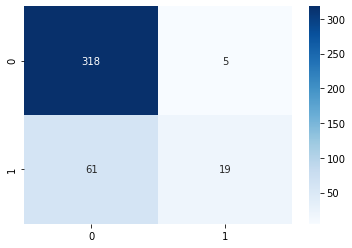

In [24]:
"""混同行列の表示
"""
from sklearn.metrics import confusion_matrix

#混同行列(Confusion Matrix)
cm=confusion_matrix(y_train_m, train_difference_predict_m_)

#fmt="d":整数で表示
sns.heatmap(cm, annot=True, cmap='Blues',fmt="d")

In [25]:
"""精度の評価
"""
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("精度:",round(accuracy_score(y_train_m, train_difference_predict_m_),3))

精度: 0.836


In [26]:
"""予測値の算出(テストデータ)
"""

#予測値：y_test_predict_m　　説明変数：X_test_array_m
y_test_predict_m=clf.predict(X_test_array_m)

#### <font color="#FFD700">さらに精度を上げる為に実測値から予測値を引いた値を予測する</font>

In [27]:
"""実測値-予測値の差分 = 実測値 - 予測値
"""
#差分：test_difference_m　　実測値：y_test_m　　予測値：y_test_predict_m
test_difference_m=y_test_m-y_test_predict_m

In [28]:
"""差分の予測値の算出
"""

#差分の予測値：test_difference_predict_m　　説明変数：X_test_array_m
test_difference_predict_m=clf_.predict(X_test_array_m)

In [29]:
"""実測値に近い値=予測値+差分の予測値
"""

#実測値に近い値：test_difference_predict_m_　　予測値：y_test_predict_m　　差分の予測値：test_difference_predict_m
test_difference_predict_m_=y_test_predict_m+test_difference_predict_m

In [30]:
"""値の置換
"""
test_difference_predict_m_が0.5以上なら1　　test_difference_predict_m_が0.5以下なら0に置き換え
test_difference_predict_m_=[1 if o>0.5 else o for o in test_difference_predict_m_]
test_difference_predict_m_=[0 if i<0.5 else i for i in test_difference_predict_m_]

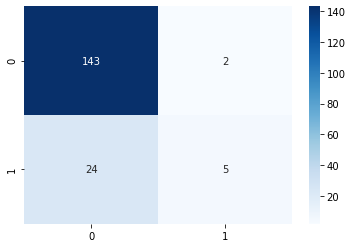

In [31]:
"""混同行列の表示
"""
from sklearn.metrics import confusion_matrix

#混同行列(Confusion Matrix)
cm=confusion_matrix(y_test_m, test_difference_predict_m_)

#fmt="d":整数で表示
sns.heatmap(cm, annot=True, cmap='Blues',fmt="d")

In [32]:
"""精度の評価
"""
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("精度:",round(accuracy_score(y_test_m, test_difference_predict_m_),3))

精度: 0.851


### <font color="#da70d6">female(女)の分析</font>

### ●グリッドサーチ

<font color="#FFB6C1">①最適な学習率の算出</font><br>
<p style="text-indent:1em">(0.005),(0.006),(0.007),(0.008),(0.009),(0.01)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">0.008</p>

<font color="#FFB6C1">②最適な学習回数の算出</font><br>
<p　style="text-indent:1em">学習率を0.008に固定</p>
<p style="text-indent:1em">(100),(200),(300),(400),(500)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">200</p>

<font color="#FFB6C1">③最適な中間層数の算出</font><br>
<p　style="text-indent:1em">学習率を0.008、学習回数を200に固定</p>
<p style="text-indent:1em">(64),(64,64),(64,64,64),(64,64,64,64),(64,64,64,64,64)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(64,64,64)→3個</p>

<font color="#FFB6C1">④単調増加</font><br>
<p　style="text-indent:1em">学習率を0.008、学習回数を200に固定</p>
<p style="text-indent:1em">(32,64,128),(64,128,256),(128,256,512)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(32,64,128)</p>

<font color="#FFB6C1">⑤単調減少</font><br>
<p　style="text-indent:1em">学習率を0.008、学習回数を200に固定</p>
<p style="text-indent:1em">(32,64,128),(512,256,128),(256,128,64),(128,64,32)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(256,128,64)</p>

<font color="#FFB6C1">⑥単調</font><br>
<p　style="text-indent:1em">学習率を0.008、学習回数を200に固定</p>
<p style="text-indent:1em">(256,128,64),(32,32,32),(64,64,64),(128,128,128),(256,256,256),(512,512,512)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(256,128,64)</p>

<font color="#FFB6C1">⑦山なり</font><br>
<p　style="text-indent:1em">学習率を0.008、学習回数を200に固定、中間層数は4個</p>
<p style="text-indent:1em">(256,128,64),(32,64,32),(32,128,32),(32,256,32),(32,256,32),(32,512,32)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(32,512,32)</p>

ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー


<font color="#FFB6C1">⑦山なり</font><br>
<p style="text-indent:1em">(32,512,32),(64,32,64),(64,128,64),(64,256,64),(64,512,64)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(32,512,32)</p>

ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

<font color="#FFB6C1">⑦山なり</font><br>
<p style="text-indent:1em">(32,512,32),(128,32,128),(128,64,128),(128,256,128),(128,512,128)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(32,512,32)</p>

ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

<font color="#FFB6C1">⑦山なり</font><br>
<p style="text-indent:1em">(32,512,32),(256,32,256),(256,64,256),(256,128,256),(256,512,256)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(32,512,32)</p>

ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

<font color="#FFB6C1">⑦山なり</font><br>
<p style="text-indent:1em">(32,512,32),(512,32,512),(512,64,512),(512,128,512),(512,256,512)</p><br>
<p　style="text-indent:1em"><font color="#FFB6C1">結果</font></p>
<p　style="text-indent:2em">(32,512,32)</p>

<p>最適なハイパーパラメータ</p>

|項目|female|
|----|----|
|学習率|0.008|
|学習回数|200|
|ユニット数|(32,512,32)|

In [33]:
"""基本モデルの作成：回帰
"""
from sklearn.neural_network import MLPRegressor
clf=MLPRegressor(
    random_state=1234)

In [34]:
"""グリッドサーチで学習率、学習回数、ユニット数の算出
"""
from sklearn import model_selection
clf_cv=model_selection.GridSearchCV(
    clf,
    {
        "learning_rate_init":[0.008],
        "max_iter":[200],
        "hidden_layer_sizes":[(32,512,32),(512,32,512),(512,64,512),(512,128,512),(512,256,512)]
    },
)
clf_cv.fit(X_train_f,y_train_f)

c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aika\appdata\local\programs\python\py

c:\users\aika\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_sta...fle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'hidden_layer_sizes

In [35]:
clf_cv.best_params_

{'hidden_layer_sizes': (512, 256, 512),
 'learning_rate_init': 0.008,
 'max_iter': 200}

### ●ニューラルネット

In [36]:
"""基本モデルの作成：回帰
"""
#最適なパラメーターでモデルを作成
clf=MLPRegressor(**clf_cv.best_params_,random_state=1234)

In [37]:
"""X_train_fとX_test_fをnumpy配列に変化し、正規化
"""
from scipy.stats import zscore
train_array_f=np.array(X_train_f)
train_array_f=train_array_f.astype(int)
X_train_array_f=zscore(train_array_f)

test_array_f=np.array(X_test_f)
test_array_f=test_array_f.astype(int)
X_test_array_f=zscore(test_array_f)

In [38]:
"""y_train_f,y_test_fを一次元に変換
"""
y_train_f=y_train_f.values.flatten()
y_test_f=y_test_f.values.flatten()

In [39]:
"""モデルの最適化
"""
#説明変数：X_train_array_f　目的変数,実測値：y_train_f
clf.fit(X_train_array_f,y_train_f)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(512, 256, 512), learning_rate='constant',
             learning_rate_init=0.008, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1234, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [40]:
"""予測値の算出(訓練データ)
"""

#予測値：y_train_predict_f　　説明変数：X_train_array_f
y_train_predict_f=clf.predict(X_train_array_f)

#### <font color="#FFD700">さらに精度を上げる為に実測値から予測値を引いた値を予測する</font>

In [41]:
"""基本モデルの作成：回帰
"""
#最適なパラメーターでモデルを作成
clf_=MLPRegressor(**clf_cv.best_params_,random_state=1234)

In [42]:
"""実測値-予測値の差分 = 実測値 - 予測値
"""
#差分：train_difference_f　　実測値：y_train_f　　予測値：y_train_predict_f
train_difference_f=y_train_f-y_train_predict_f

In [43]:
"""差分を目的変数として学習させる(説明変数は同じ)
"""

#説明変数：X_train_array_f　　目的変数,差分：train_difference_f
clf_.fit(X_train_array_f,train_difference_f)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(512, 256, 512), learning_rate='constant',
             learning_rate_init=0.008, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1234, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [44]:
"""差分の予測値の算出
"""

#差分の予測値：train_difference_predict_f　　説明変数：X_train_array_f
train_difference_predict_f=clf_.predict(X_train_array_f)

In [45]:
"""実測値に近い値=予測値+差分の予測値
"""

#実測値に近い値：train_difference_predict_f_　　予測値：y_train_predict_f　　差分の予測値：train_difference_predict_f
train_difference_predict_f_=y_train_predict_f+train_difference_predict_f

In [46]:
"""値の置換
"""
#train_difference_predict_m_が0.5以上なら1　　train_difference_predict_m_が0.5以下なら0に置き換え
train_difference_predict_f_=[1 if o>0.5 else o for o in train_difference_predict_f_]
train_difference_predict_f_=[0 if i<0.5 else i for i in train_difference_predict_f_]

In [47]:
"""ライブラリのインストール
"""
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

You should consider upgrading via the 'c:\users\aika\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


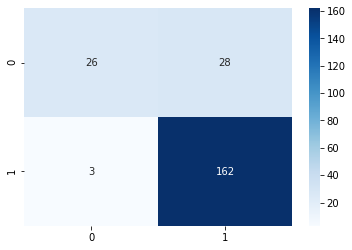

In [48]:
"""混同行列の表示
"""
from sklearn.metrics import confusion_matrix

#混同行列(Confusion Matrix)
cm=confusion_matrix(y_train_f, train_difference_predict_f_)

#fmt="d":整数で表示
sns.heatmap(cm, annot=True, cmap='Blues',fmt="d")

In [49]:
"""精度の評価
"""
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("精度:",round(accuracy_score(y_train_f, train_difference_predict_f_),3))

精度: 0.858


In [50]:
"""予測値の算出(テストデータ)
"""

#予測値：y_test_predict_f　　説明変数：X_test_array_f
y_test_predict_f=clf.predict(X_test_array_f)

In [51]:
"""さらに精度を上げる為に実測値から予測値を引いた値を予測する
"""

#差分：test_difference_f　　実測値：y_test_f　　予測値：y_test_predict_f
test_difference_f=y_test_f-y_test_predict_f

In [52]:
"""差分の予測値の算出
"""

#差分の予測値：test_difference_predict_f　　説明変数：X_test_array_f
test_difference_predict_f=clf_.predict(X_test_array_f)

In [53]:
"""実測値に近い値=予測値+差分の予測値
"""

#実測値に近い値：test_difference_predict_f_　　予測値：y_test_predict_f　　差分の予測値：test_difference_predict_f
test_difference_predict_f_=y_test_predict_f+test_difference_predict_f

In [54]:
"""値の置換
"""
#test_difference_predict_m_が0.5以上なら1　　test_difference_predict_m_が0.5以下なら0に置き換え
test_difference_predict_f_=[1 if o>0.5 else o for o in test_difference_predict_f_]
test_difference_predict_f_=[0 if i<0.5 else i for i in test_difference_predict_f_]

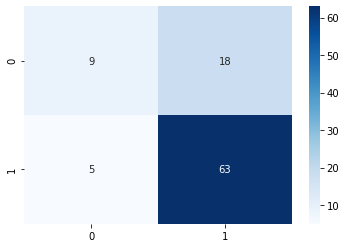

In [55]:
"""混同行列の表示
"""
from sklearn.metrics import confusion_matrix

#混同行列(Confusion Matrix)
cm=confusion_matrix(y_test_f, test_difference_predict_f_)

#fmt="d":整数で表示
sns.heatmap(cm, annot=True, cmap='Blues',fmt="d")

In [56]:
"""精度の評価
"""
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("精度:",round(accuracy_score(y_test_f, test_difference_predict_f_),3))

精度: 0.758


In [57]:
"""全体の精度
"""
#男の正解した数+女の正解した数/全体の人数
test_positive_m=int(sum(test_difference_predict_m_==y_test_m))
test_positive_f=int(sum(test_difference_predict_f_==y_test_f))
y_all_positive=test_positive_m+test_positive_f
y_test=len(y_test_m)+len(y_test_f)
print(y_all_positive/y_test)

0.8178438661710037
